In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
sns.set()

In [4]:
data = pd.read_csv('new_data.csv')

In [5]:
data.head()

,Unnamed: 0,member_id,shop_name,shop_id,gender,total_bk,finished_bk,deleted_bk,no_show,bought_item,remain
0,0,00000,TW,6,F,84,0,59,23,0,N
1,1,11508,GT,28,F,3,2,0,0,2,Y
2,2,118,TPE,58,M,1,0,0,1,0,N
3,3,142,YAA,63,F,1,0,1,0,0,N
4,4,3023,YAB,64,F,8,2,5,0,2,Y


In [6]:
data.drop('Unnamed: 0',1,inplace=True)

In [7]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 91574 entries, 0 to 91573
Data columns (total 10 columns):
member_id      91574 non-null object
shop_name      91574 non-null object
shop_id        91574 non-null int64
gender         91574 non-null object
total_bk       91574 non-null int64
finished_bk    91574 non-null int64
deleted_bk     91574 non-null int64
no_show        91574 non-null int64
bought_item    91574 non-null int64
remain         91574 non-null object
dtypes: int64(6), object(4)
memory usage: 7.0+ MB


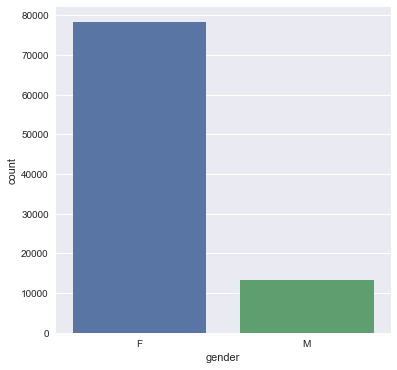

In [69]:
fig,ax = plt.subplots(figsize=(6, 6))
sns.countplot(x='gender', data=data)

In [78]:
data.describe(include=['O'])

,member_id,shop_name,gender,remain
count,91574,91574,91574,91574
unique,91574,47,2,2
top,MKK11361,MKK,F,Y
freq,1,37257,78238,46470


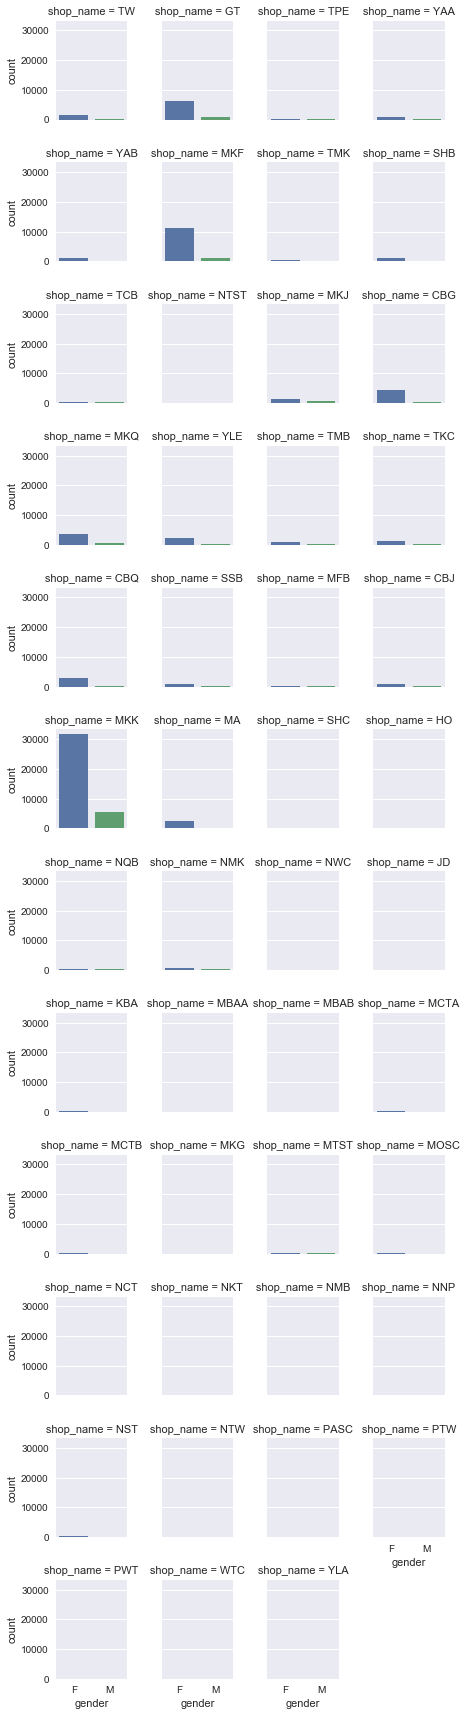

In [77]:
sns.factorplot("gender", col="shop_name", col_wrap=4, data=data,kind="count", size=2, aspect=0.8)

Text(0.5,1,'Total number of booking : 960966')

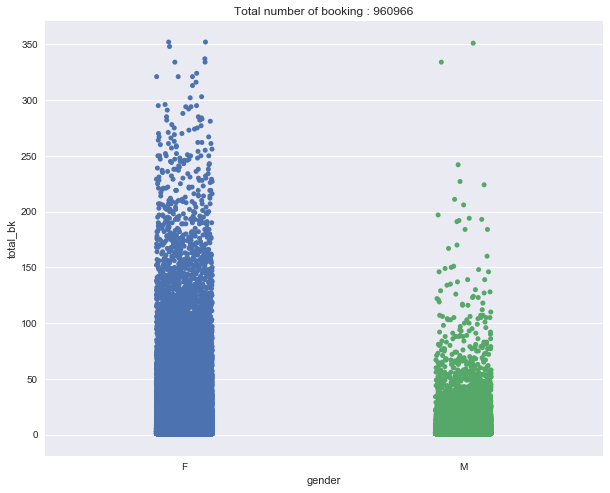

In [51]:
fig,ax = plt.subplots(figsize=(10, 8))
sns.stripplot(x='gender', y='total_bk',jitter=True, data=data).set_title("Total number of booking : 960966")

Text(0.5,1,'Total number of finished booking : 524596')

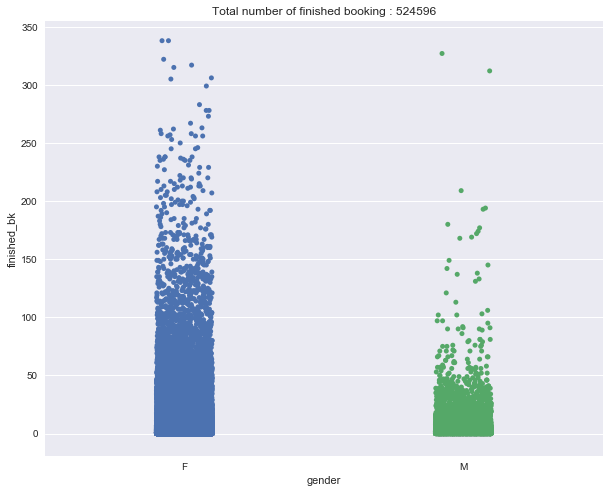

In [68]:
fig,ax = plt.subplots(figsize=(10, 8))
sns.stripplot(x='gender', y='finished_bk',jitter=True, data=data).set_title('Total number of finished booking : 524596')

Text(0.5,1,'Total number of deleted booking : 347521')

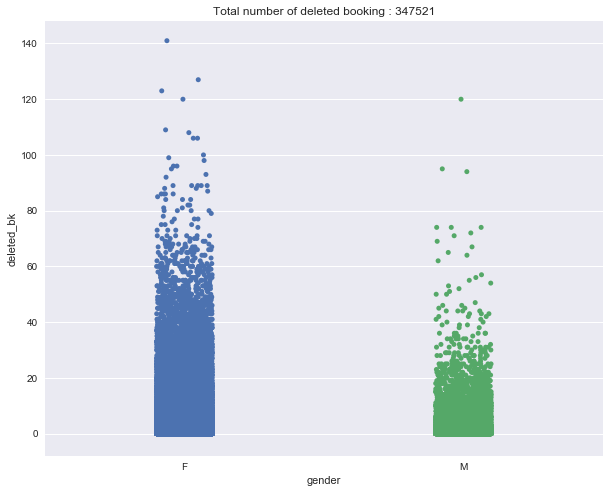

In [53]:
fig,ax = plt.subplots(figsize=(10, 8))
sns.stripplot(x='gender', y='deleted_bk',jitter=True, data=data).set_title('Total number of deleted booking : 347521')

Text(0.5,1,'Total number of no show : 22377 ')

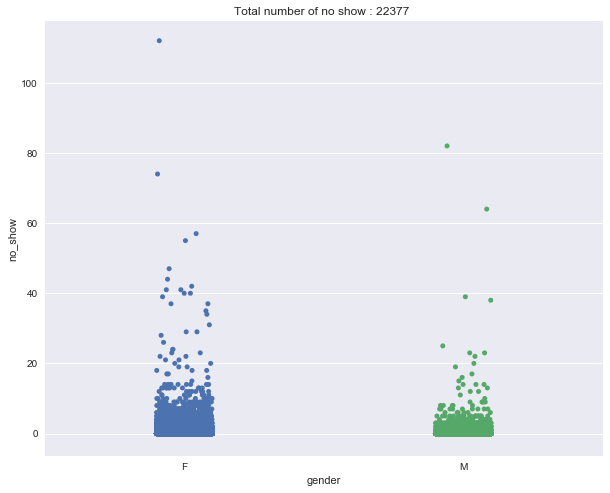

In [54]:
fig,ax = plt.subplots(figsize=(10, 8))
sns.stripplot(x='gender', y='no_show',jitter=True, data=data).set_title('Total number of no show : 22377 ')

Text(0.5,1,'Total number of saled item : 304109 ')

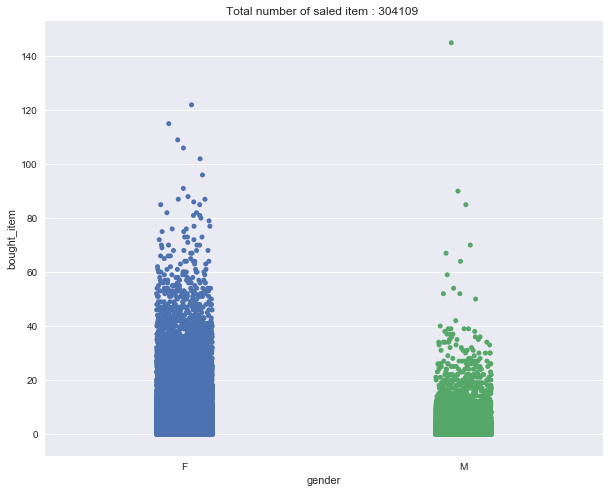

In [55]:
fig,ax = plt.subplots(figsize=(10, 8))
sns.stripplot(x='gender', y='bought_item',jitter=True, data=data).set_title('Total number of saled item : 304109 ')

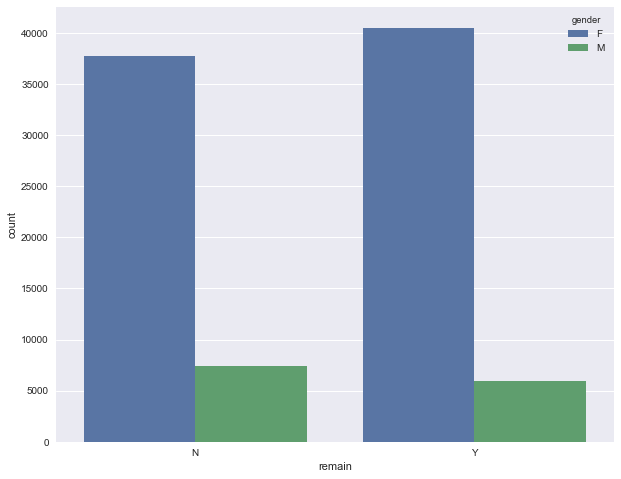

In [67]:
fig,ax = plt.subplots(figsize=(10, 8))
sns.set_style("darkgrid")
sns.countplot(x='remain',hue='gender', data=data)

In [58]:
print(data['total_bk'].sum() - data['finished_bk'].sum() - data['no_show'].sum() - data['deleted_bk'].sum())

66472


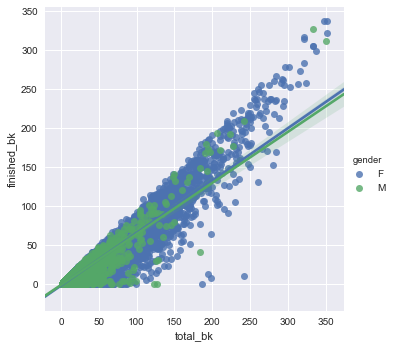

In [60]:
#fig,ax = plt.subplots(figsize=(6, 6))
sns.lmplot(x='total_bk', y='finished_bk', hue='gender', data=data)

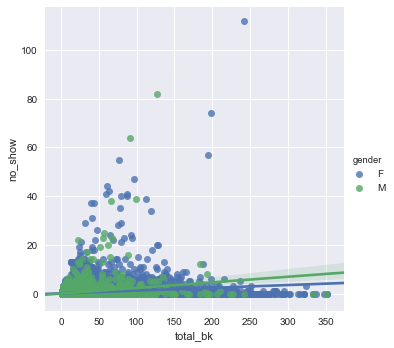

In [30]:
sns.lmplot(x='total_bk', y='no_show', hue='gender', data=data)

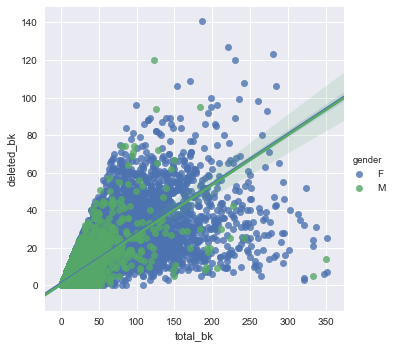

In [10]:
sns.lmplot(x='total_bk', y='deleted_bk', hue='gender', data=data)

In [5]:
deleted = data['deleted_bk']
data.drop(labels=['deleted_bk'], axis=1,inplace = True)
data.insert(0, 'deleted_bk', deleted)
data.head()

,deleted_bk,member_id,shop_name,shop_id,gender,total_bk,finished_bk,no_show,bought_item,remain
0,59,00000,TW,6,F,84,0,23,0,N
1,0,11508,GT,28,F,3,2,0,2,Y
2,0,118,TPE,58,M,1,0,1,0,N
3,1,142,YAA,63,F,1,0,0,0,N
4,5,3023,YAB,64,F,8,2,0,2,Y


In [6]:
data.drop(['shop_name','shop_id'],1,inplace=True)
#data_dum = pd.get_dummies(data, drop_first=True)
#data_dum.head()

In [30]:
from sklearn import metrics
from sklearn.cluster import KMeans, MiniBatchKMeans
from sklearn.decomposition import PCA
from sklearn.preprocessing import scale
from sklearn.preprocessing import LabelEncoder, OneHotEncoder
from sklearn.cluster import DBSCAN
from sklearn.metrics import silhouette_samples, silhouette_score
from sklearn.datasets.samples_generator import make_blobs
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import Normalizer

In [8]:
data.head()

,deleted_bk,member_id,gender,total_bk,finished_bk,no_show,bought_item,remain
0,59,00000,F,84,0,23,0,N
1,0,11508,F,3,2,0,2,Y
2,0,118,M,1,0,1,0,N
3,1,142,F,1,0,0,0,N
4,5,3023,F,8,2,0,2,Y


In [9]:
data2 = data.copy()
data2.drop('member_id',1 , inplace=True)
data2.head()

,deleted_bk,gender,total_bk,finished_bk,no_show,bought_item,remain
0,59,F,84,0,23,0,N
1,0,F,3,2,0,2,Y
2,0,M,1,0,1,0,N
3,1,F,1,0,0,0,N
4,5,F,8,2,0,2,Y


In [10]:
data_dum = pd.get_dummies(data2, drop_first=True)
data_dum.head()

,deleted_bk,total_bk,finished_bk,no_show,bought_item,gender_M,remain_Y
0,59,84,0,23,0,0,0
1,0,3,2,0,2,0,1
2,0,1,0,1,0,1,0
3,1,1,0,0,0,0,0
4,5,8,2,0,2,0,1


,deleted_bk,total_bk,finished_bk,no_show,bought_item,gender_M,remain_Y
deleted_bk,1.000000,0.806721,0.599114,0.272341,0.620441,-0.080076,0.213682
total_bk,0.806721,1.000000,0.949221,0.234221,0.761506,-0.063171,0.241611
finished_bk,0.599114,0.949221,1.000000,0.089114,0.731487,-0.046492,0.220816
no_show,0.272341,0.234221,0.089114,1.000000,0.125859,-0.015560,0.049682
bought_item,0.620441,0.761506,0.731487,0.125859,1.000000,-0.056041,0.282675
gender_M,-0.080076,-0.063171,-0.046492,-0.015560,-0.056041,1.000000,-0.050001
remain_Y,0.213682,0.241611,0.220816,0.049682,0.282675,-0.050001,1.000000


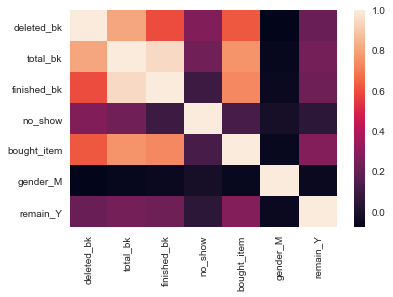

In [11]:
corr = data_dum.corr()
corr = (corr)
sns.heatmap(corr, 
            xticklabels=corr.columns.values,
            yticklabels=corr.columns.values)

corr

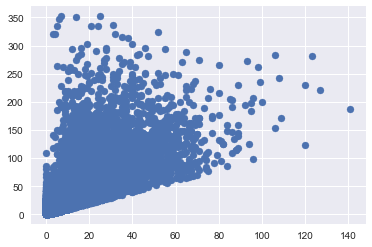

In [13]:
X = data_dum.values
plt.scatter(X[:, 0], X[:, 1], marker='o')
plt.show()

In [16]:
ndata = np.array(data_dum)

In [17]:
ndata[:, 0] = LabelEncoder().fit_transform(ndata[:, 0])
enc = OneHotEncoder().fit(ndata)
enc.n_values_
enc.feature_indices_

array([   0,  104,  457,  796,  909, 1055, 1057, 1059])

In [18]:
print(enc.transform(ndata).toarray())

[[0. 0. 0. ... 0. 1. 0.]
 [1. 0. 0. ... 0. 0. 1.]
 [1. 0. 0. ... 1. 1. 0.]
 ...
 [0. 1. 0. ... 1. 1. 0.]
 [0. 1. 0. ... 1. 0. 1.]
 [0. 1. 0. ... 0. 1. 0.]]


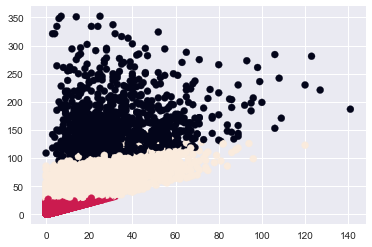

In [18]:
y_pred = KMeans(n_clusters=3, random_state=9).fit_predict(X)
plt.scatter(X[:, 0], X[:, 1], c=y_pred)
plt.show()

/Users/admin/anaconda3/lib/python3.6/site-packages/sklearn/utils/validation.py:475: DataConversionWarning: Data with input dtype int64 was converted to float64 by StandardScaler.
  warnings.warn(msg, DataConversionWarning)


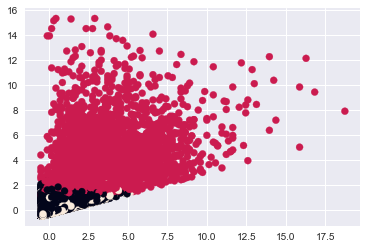

In [24]:
X_sc = StandardScaler().fit_transform(X)
y_pred1 = KMeans(n_clusters=3, random_state=9).fit_predict(X_sc)
plt.scatter(X_sc[:, 0], X_sc[:, 1], c=y_pred1)
plt.show()

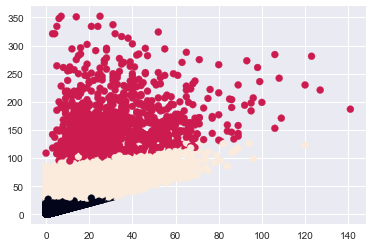

In [25]:
y_pred3 = MiniBatchKMeans(n_clusters=3, random_state=10).fit_predict(X)
plt.scatter(X[:, 0], X[:, 1], c=y_pred3)
plt.show()

/Users/admin/anaconda3/lib/python3.6/site-packages/sklearn/utils/validation.py:475: DataConversionWarning: Data with input dtype int64 was converted to float64 by StandardScaler.
  warnings.warn(msg, DataConversionWarning)


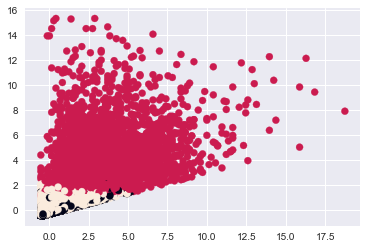

In [19]:
X_sc = StandardScaler().fit_transform(X)
y_pred2 = MiniBatchKMeans(n_clusters=3, random_state=10).fit_predict(X_sc)
plt.scatter(X_sc[:, 0], X_sc[:, 1], c=y_pred2)
plt.show()

In [22]:
print(y_pred)
print(y_pred2)

[2 1 1 ... 1 1 1]
[1 2 0 ... 0 2 0]
